In [3]:
import pathlib 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statannotations.Annotator import Annotator

videos_path = pathlib.PureWindowsPath("C:\\Users\\foxy3\\OneDrive\\Документы\\MATLAB\\min1pipe_data")
path = videos_path.joinpath("group_dt.csv")
dt = pd.read_csv(path)
dt.head()

,group,mean_events_number,median_events_number,mean_events_duration,median_events_duration,mean_events_rate,median_events_rate
0,30,1.417197,0.0,26.236501,22.00,0.002362,0.000000
1,30,2.980000,1.0,27.275431,23.50,0.004967,0.001667
2,30,1.198529,0.0,23.979429,23.00,0.001998,0.000000
3,30,1.321526,0.0,23.898717,20.00,0.002203,0.000000
4,30,1.804487,1.0,22.247238,20.25,0.003007,0.001667


p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

30 vs. 53: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=4.500e+01
53 vs. hyp: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=3.600e+01
hyp vs. int: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=9.700e+01
30 vs. hyp: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=2.500e+01
53 vs. int: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=7.700e+01
30 vs. int: Mann-Whitney-Wilcoxon test two-sided with Bonferroni correction, P_val:1.000e+00 U_stat=6.200e+01
p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
   

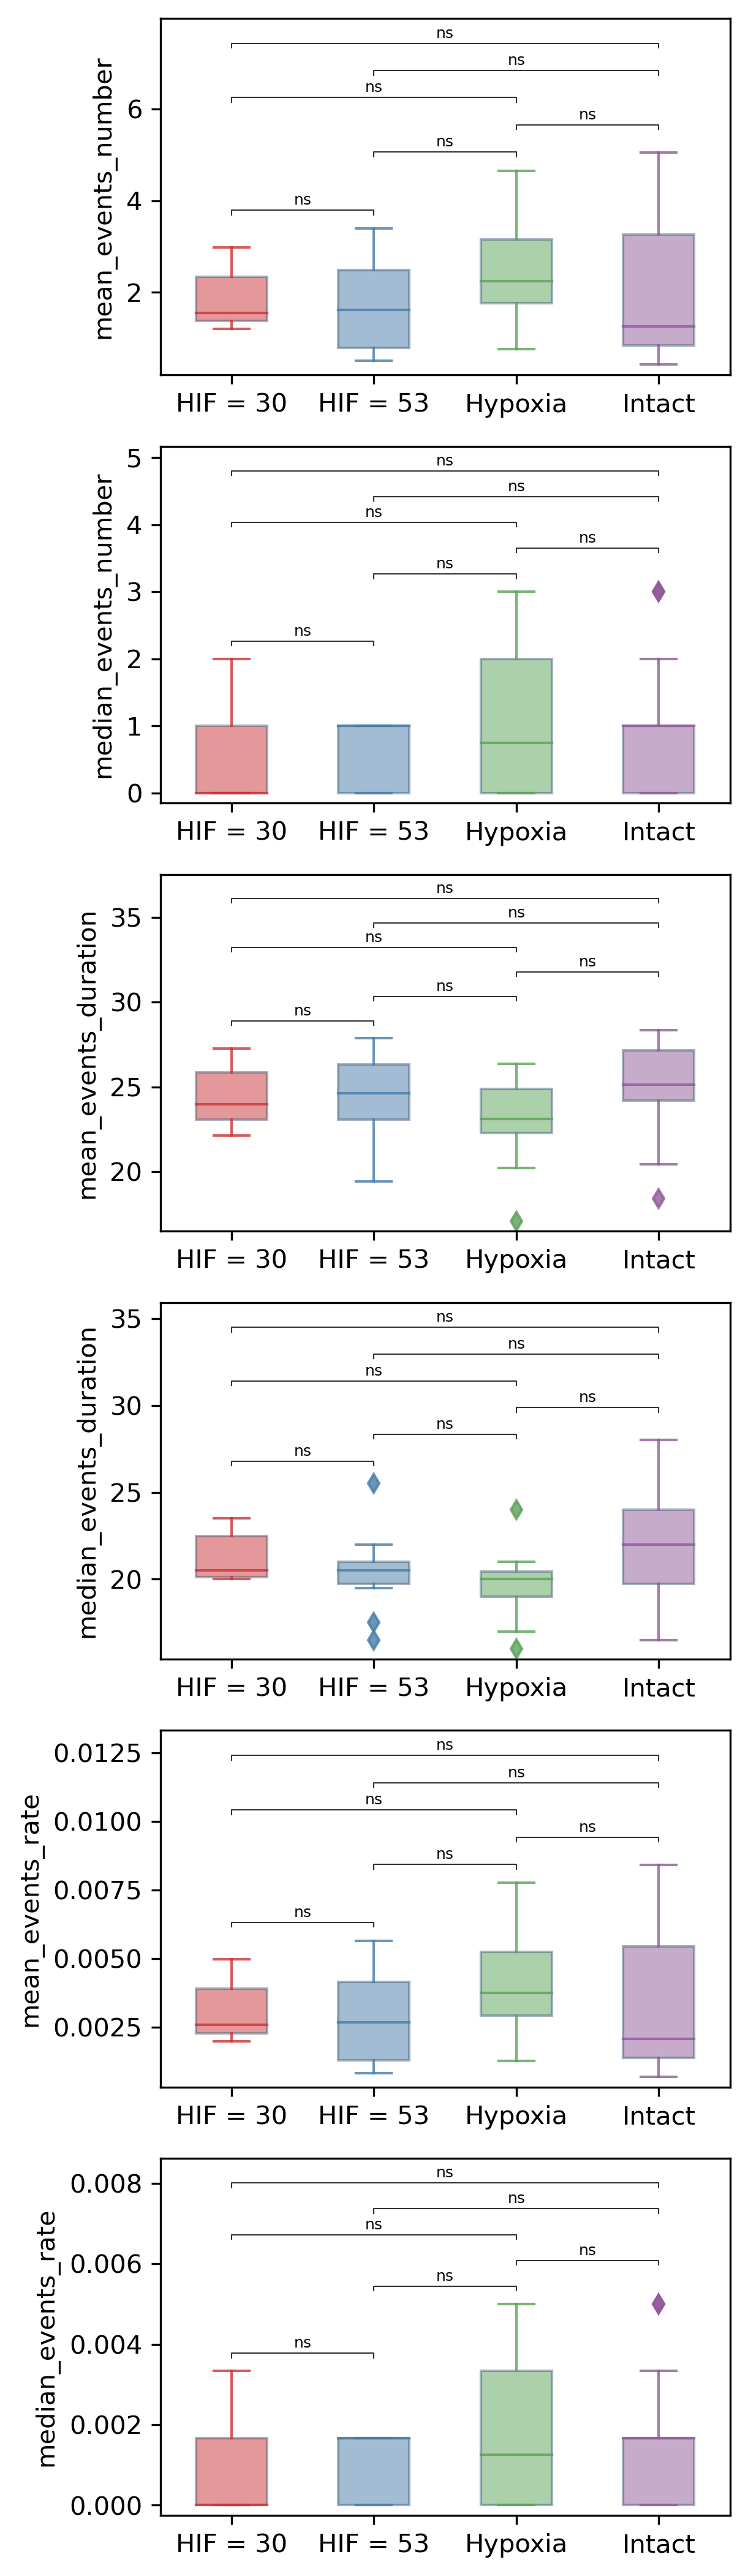

In [11]:
def rotate(l, n):
    return l[n:] + l[:n]

captions = ['HIF = 30', 'HIF = 53', 'Hypoxia', 'Intact']
captions2 = ["30", "53", "hyp", "int"]
fig, axs = plt.subplots(6, figsize=(4, 18), dpi=300)
list_axes = [[0,0], [0, 1], [1, 0], [1, 1], [2, 0], [2, 1]]
list_y = list(dt.columns)[1:]
sns.set_palette(rotate(sns.color_palette("Set1", 12), 0))
for j in range(6):#list_axes:
    bx = sns.boxplot(data=dt, x="group", y=list_y[j], width = 0.5, boxprops=dict(alpha=.5), ax = axs[j])

    for i, box in enumerate(bx.artists): 
            color = box.get_facecolor()
            color = list(color)
            color[3] = 0.8
            box.set_edgecolor([.3,.4,.5,.6])
            box.set_linewidth(1)
            
            for k in range(i*6,i*6+6):
                bx.lines[k].set_color(color)
                bx.lines[k].set_mec(color)
                bx.lines[k].set_mfc(color)
                bx.lines[k].set_linewidth(1)

    axs[j].set_xticklabels(captions, fontsize = 10)
    axs[j].set_ylabel(list_y[j], fontsize = 10)
    axs[j].set_xlabel('')
    
    annot = Annotator(axs[j], [("30", "53"), ("53", "hyp"),
                               ("hyp", "int"), ("30", "hyp"),
                               ("53", "int"), ("30", "int")],
                  data=dt, x="group", y=list_y[j], order=captions2)
    annot.configure(test='Mann-Whitney', comparisons_correction="Bonferroni", text_format ="star",
                loc='inside', verbose=2, line_width=0.5, fontsize = 6)
    annot.apply_test()
    axs[j], test_results = annot.annotate()
    
plt.show()